<a href="https://colab.research.google.com/github/gabrielnapolis/datasets/blob/main/Notebook_Gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de dados para predição de doenças cardíacas

## **Dataset Utilizado:** https://www.kaggle.com/datasets/krishujeniya/heart-diseae/data

### O conjunto de dados consiste em registros médicos de 303 pacientes, cada um caracterizado por 14 características diferentes que podem ser relevantes para prever **doenças cardíacas**. Os atributos incluídos no conjunto de dados são os seguintes:

0.   **Age:** Idade do paciente em anos.
1.   **Sex:** Gênero do paciente (1 = masculino, 0 = feminino)
2.   **Chest Pain Type (cp):** Indica o tipo de dor no peito experimentada pelo paciente (0 = angina típica, 1 = angina atípica, 2 = dor não anginosa, 3 = assintomático).
3.   **Resting Blood Pressure (trestbps):** A pressão arterial em repouso do paciente medida em mm Hg na admissão.
4.   **Serum Cholesterol (chol):** Nível de colesterol sérico do paciente em mg/dl.
5.   **Fasting Blood Sugar (fbs):** Fasting blood sugar level greater than 120 mg/dl (1 = true, 0 = false).
6.   **Resting Electrocardiographic Results (restecg):** Os resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade da onda ST-T, 2 = possível ou definitiva hipertrofia ventricular esquerda).
7.   **Maximum Heart Rate Achieved (thalach):** A frequência cardíaca mais alta alcançada durante o teste de exercício.
8.   **Exercise-Induced Angina (exang):** Se o paciente apresentou angina induzida por exercício (1 = sim, 0 = não).
09.  **ST Depression (oldpeak):** Depressão do segmento ST observada no eletrocardiograma durante o exercício em relação ao repouso.
10.  **Slope of Peak Exercise ST Segment (slope):** Descreve a inclinação do segmento ST do pico do exercício (0 = ascendente, 1 = plano, 2 = descendente).
11.  **Number of Major Vessels (ca):** Número de vasos principais (variando de 0 a 3) visíveis por fluoroscopia.
12.  **Thalassemia (thal)**: Distúrbio sanguíneo (1 = normal, 2 = defeito fixo, 3 = defeito reversível).
13.  **Target:** Indica a presença ou ausência de doença cardíaca (1 = presença, 0 = ausência).


### Para essa predição, foi escolhido o modelo **SVM**, com o dataset normalizado, onde foi encontrado, entre todos que foram testados, a melhor acurária de 84,6%.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports de bibliotecas
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [ ]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/gabrielnapolis/datasets/main/heart-disease.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Exibe as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.636333 (0.084741)
CART: 0.793333 (0.078436)
NB: 0.826000 (0.100519)
SVM: 0.636167 (0.078881)


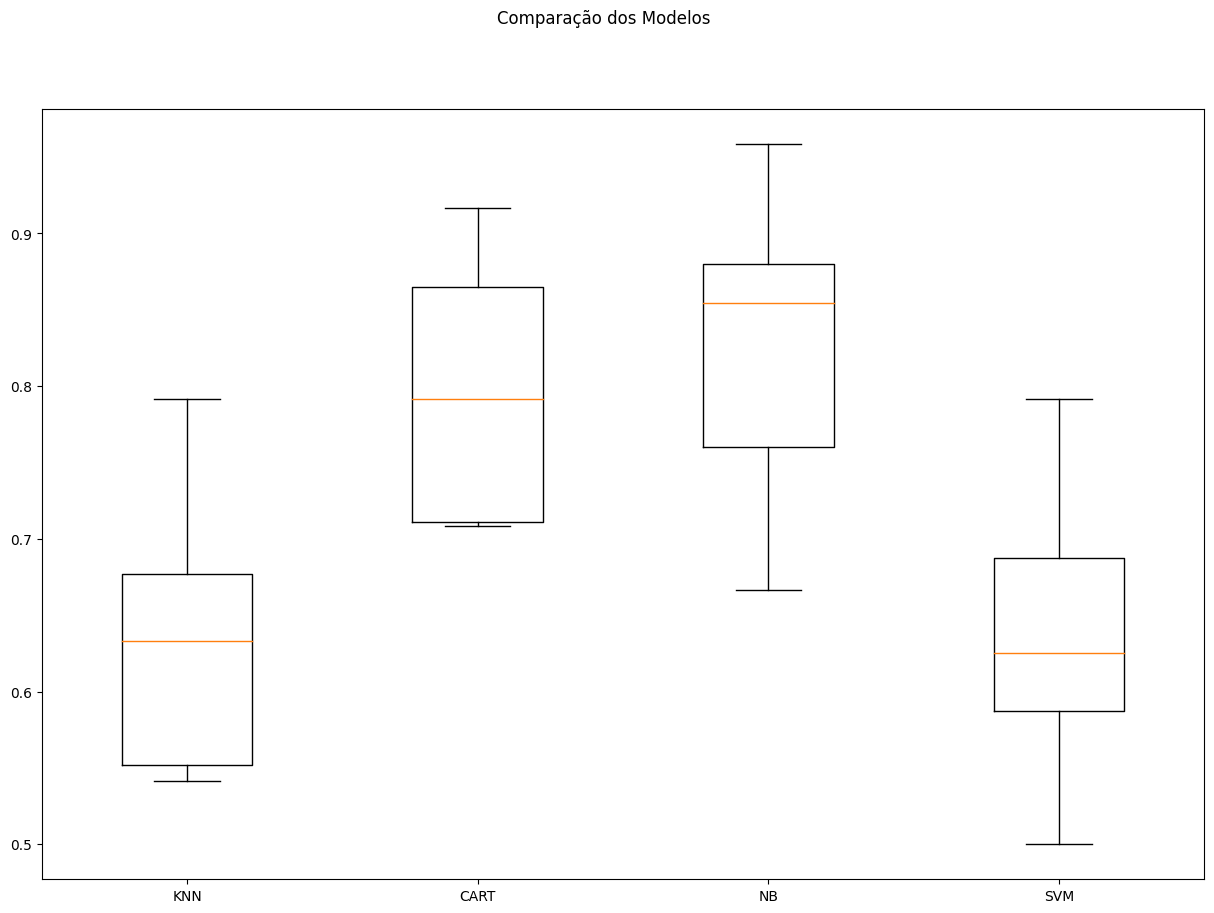

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.636 (0.085)
CART-orig: 0.793 (0.078)
NB-orig: 0.826 (0.101)
SVM-orig: 0.636 (0.079)
KNN-padr: 0.810 (0.073)
CART-padr: 0.822 (0.081)
NB-padr: 0.826 (0.101)
SVM-padr: 0.825 (0.093)
KNN-norm: 0.830 (0.072)
CART-norm: 0.809 (0.082)
NB-norm: 0.826 (0.101)
SVM-norm: 0.846 (0.088)


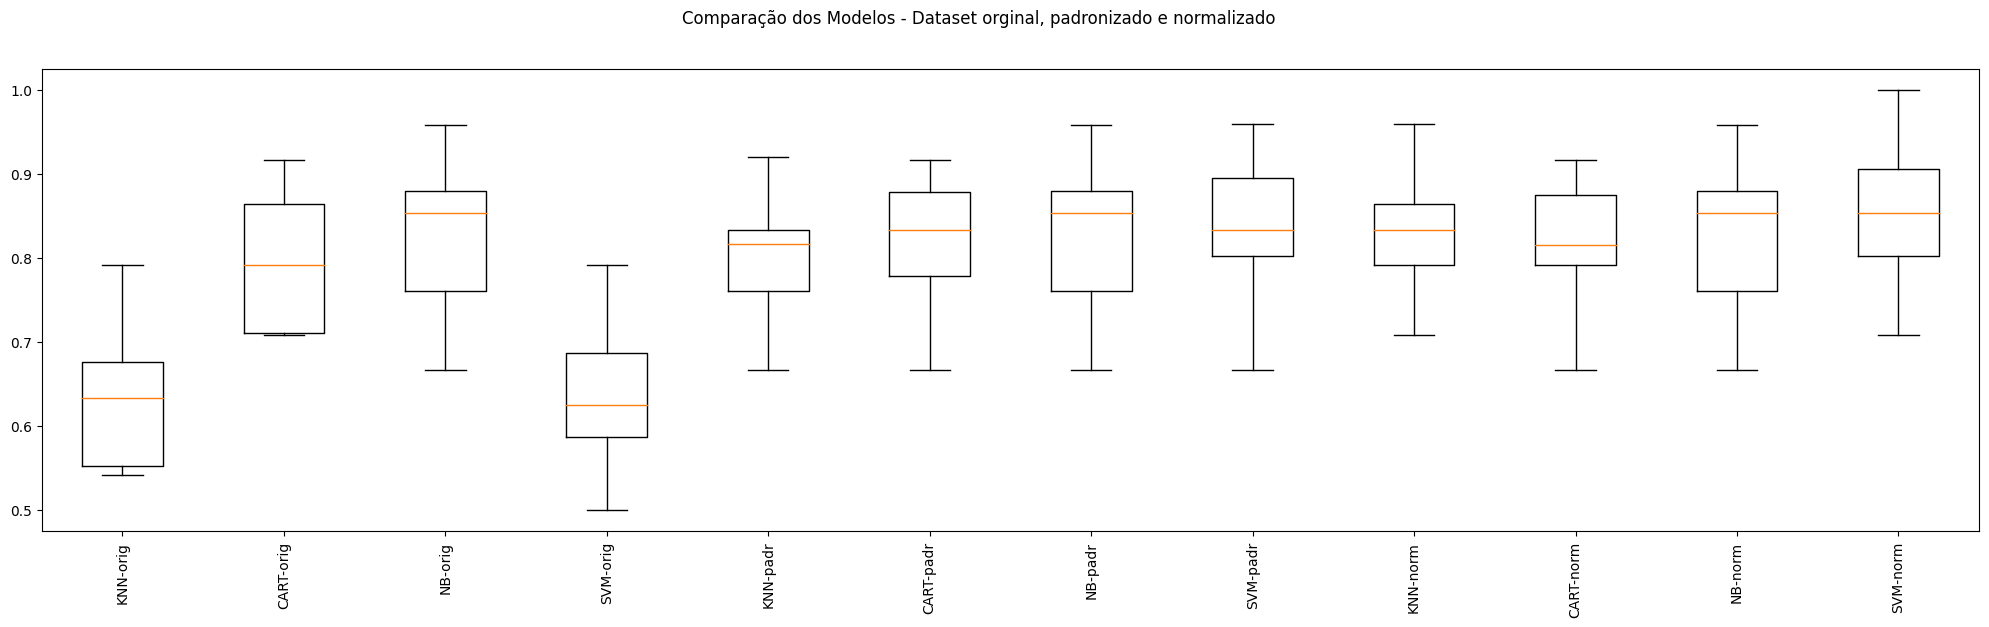

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do SVM

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('SVM-orig', Pipeline(steps=[svm])))
pipelines.append(('SVM-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('SVM-norm', Pipeline(steps=[min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': [1, 0.1, 0.01, 0.001],
    'SVM__kernel': ['rbf', 'linear']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print(f"{name} - Melhor score: {grid.best_score_:.6f} usando {grid.best_params_}")

SVM-orig - Melhor score: 0.826333 usando {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
SVM-padr - Melhor score: 0.830333 usando {'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
SVM-norm - Melhor score: 0.846333 usando {'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC(C=1, gamma=1, kernel='rbf')
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.819672131147541


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

SVC(C=1, gamma=1)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados onde a classe é desconhecida.
data = {'age':  [63,37],
        'sex': [1, 1],
        'cp': [3, 2],
        'trestbps': [145, 130],
        'chol': [233, 250],
        'fbs': [1, 0],
        'restecg': [0, 1],
        'thalach': [150, 187],
        'exang': [0, 0],
        'oldpeak': [2.3, 3.5],
        'slope': [0, 0],
        'ca': [0, 0],
        'thal': [1, 1]
        }

atributos = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -2.14887271]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1.]


### Conclusão

## Após a criação do modelo, utilizando o SVM, com os dados normalizados, foi possível realizar uma predição informando dados novos, onde a classe era desconhecida.
